# Multi-Class Leaf Disease Detection on Vegetable Crops using CNNs and Explainable AI (XAI) with PyTorch

This dataset and analysis has been published 15 June 2024

This notebook demonstrates:

1. Building a custom CNN model from scratch for multi-class leaf disease detection on five widely grown vegetable crops in Bangladesh.

2. Transfer learning models (resnext101_32x8d, densenet201, efficientnetv2_m, mobilenet_v2 and seresnext101_32x8d).

3. Training with dataset augmentation and early stopping.

4. Visualization of training and validation loss curves.

5. Model evaluation with precision, recall, and F1-score.

6. XAI techniques for best model : Grad-CAM, Grad-CAM++, Eigen-CAM, and LIME for model interpretation.

## Organized Plant Disease Dataset by Category and Disease Type

In [3]:
import os
import shutil
from pathlib import Path

# Input and output directories
input_root_dir = "/kaggle/input/project/project"
output_root_dir = "/kaggle/working/project"

# Image extensions
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

def flatten_dataset():
    # Clear and copy dataset
    if os.path.exists(output_root_dir):
        shutil.rmtree(output_root_dir)
    shutil.copytree(input_root_dir, output_root_dir)

    # Process each vegetable folder
    for vegetable in os.listdir(output_root_dir):
        vegetable_dir = os.path.join(output_root_dir, vegetable)
        if not os.path.isdir(vegetable_dir):
            continue

        # Move subfolders to root level
        for subfolder in os.listdir(vegetable_dir):
            subfolder_path = os.path.join(vegetable_dir, subfolder)
            if os.path.isdir(subfolder_path):
                # For Eggplant and Tomato, move as-is
                if vegetable in ["Eggplant", "Tomato"]:
                    new_folder_name = subfolder
                # For others, add vegetable name
                else:
                    new_folder_name = f"{vegetable} {subfolder}"
                shutil.move(subfolder_path, os.path.join(output_root_dir, new_folder_name))
        shutil.rmtree(vegetable_dir)

def count_images():
    print("\nFolder Structure and Image Counts:")
    print("-" * 40)
    total_images = 0
    # Get sorted list of folders
    folders = sorted([f for f in os.listdir(output_root_dir) if os.path.isdir(os.path.join(output_root_dir, f))])
    
    # Print folders with numbering
    for idx, folder in enumerate(folders, 1):
        folder_path = os.path.join(output_root_dir, folder)
        image_count = sum(1 for item in os.listdir(folder_path) 
                         if os.path.isfile(os.path.join(folder_path, item)) 
                         and Path(item).suffix.lower() in image_extensions)
        total_images += image_count
        print(f"{idx}. {folder}: {image_count} images")
    print("-" * 40)
    print(f"Total number of images: {total_images}")

def main():
    flatten_dataset()
    count_images()

if __name__ == "__main__":
    main()


Folder Structure and Image Counts:
----------------------------------------
1. Bitter Gourd Downey mildew: 570 images
2. Bitter Gourd Fresh leaf: 551 images
3. Bitter Gourd Fusarium wilt: 502 images
4. Bitter Gourd Mosaic virus: 600 images
5. Bottle gourd Anthracnose: 601 images
6. Bottle gourd Downey mildew: 684 images
7. Bottle gourd Fresh leaf: 518 images
8. Cauliflower Black Rot: 560 images
9. Cauliflower Downy mildew: 512 images
10. Cauliflower Fresh leaf: 526 images
11. Cucumber Anthracnose lesions: 535 images
12. Cucumber Downy mildew: 564 images
13. Cucumber Fresh leaf: 527 images
14. Eggplant Cercopora leaf spot: 723 images
15. Eggplant begomovirus: 720 images
16. Eggplant fresh leaf: 771 images
17. Eggplant verticillium wilt: 730 images
18. Tomato Bacterial spot: 589 images
19. Tomato Fresh leaf: 594 images
20. Tomato leaf curl virus: 755 images
21. Tomato spotted wilt: 654 images
----------------------------------------
Total number of images: 12786


## Bar Chart Representation of Folder-wise Image Counts



Bar chart saved as 'image_count_plot.png'


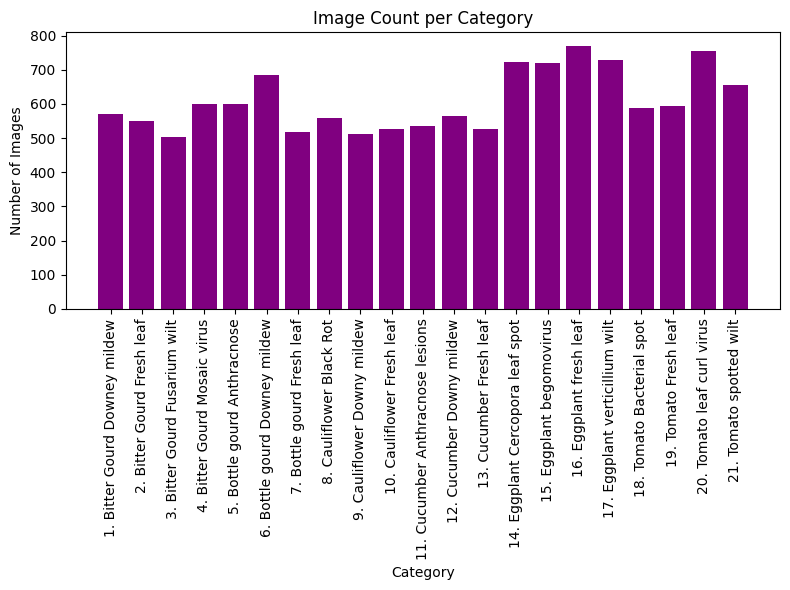

In [4]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Output directory (where the 21 folders are located)
output_root_dir = "/kaggle/working/project"

# Image extensions
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

# Count images and prepare data for plotting
image_counts = {}
for index, folder in enumerate(sorted(os.listdir(output_root_dir)), 1):
    folder_path = os.path.join(output_root_dir, folder)
    if os.path.isdir(folder_path):
        image_count = sum(1 for item in os.listdir(folder_path) 
                         if os.path.isfile(os.path.join(folder_path, item)) 
                         and Path(item).suffix.lower() in image_extensions)
        image_counts[f"{index}. {folder}"] = image_count

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='purple')
plt.title("Image Count per Category")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)  # Changed rotation to 90 for vertical labels
plt.tight_layout()

# Save the plot
plt.savefig("image_count_plot.png")
print("\nBar chart saved as 'image_count_plot.png'")
plt.show()

## A Glimpse from Every Category

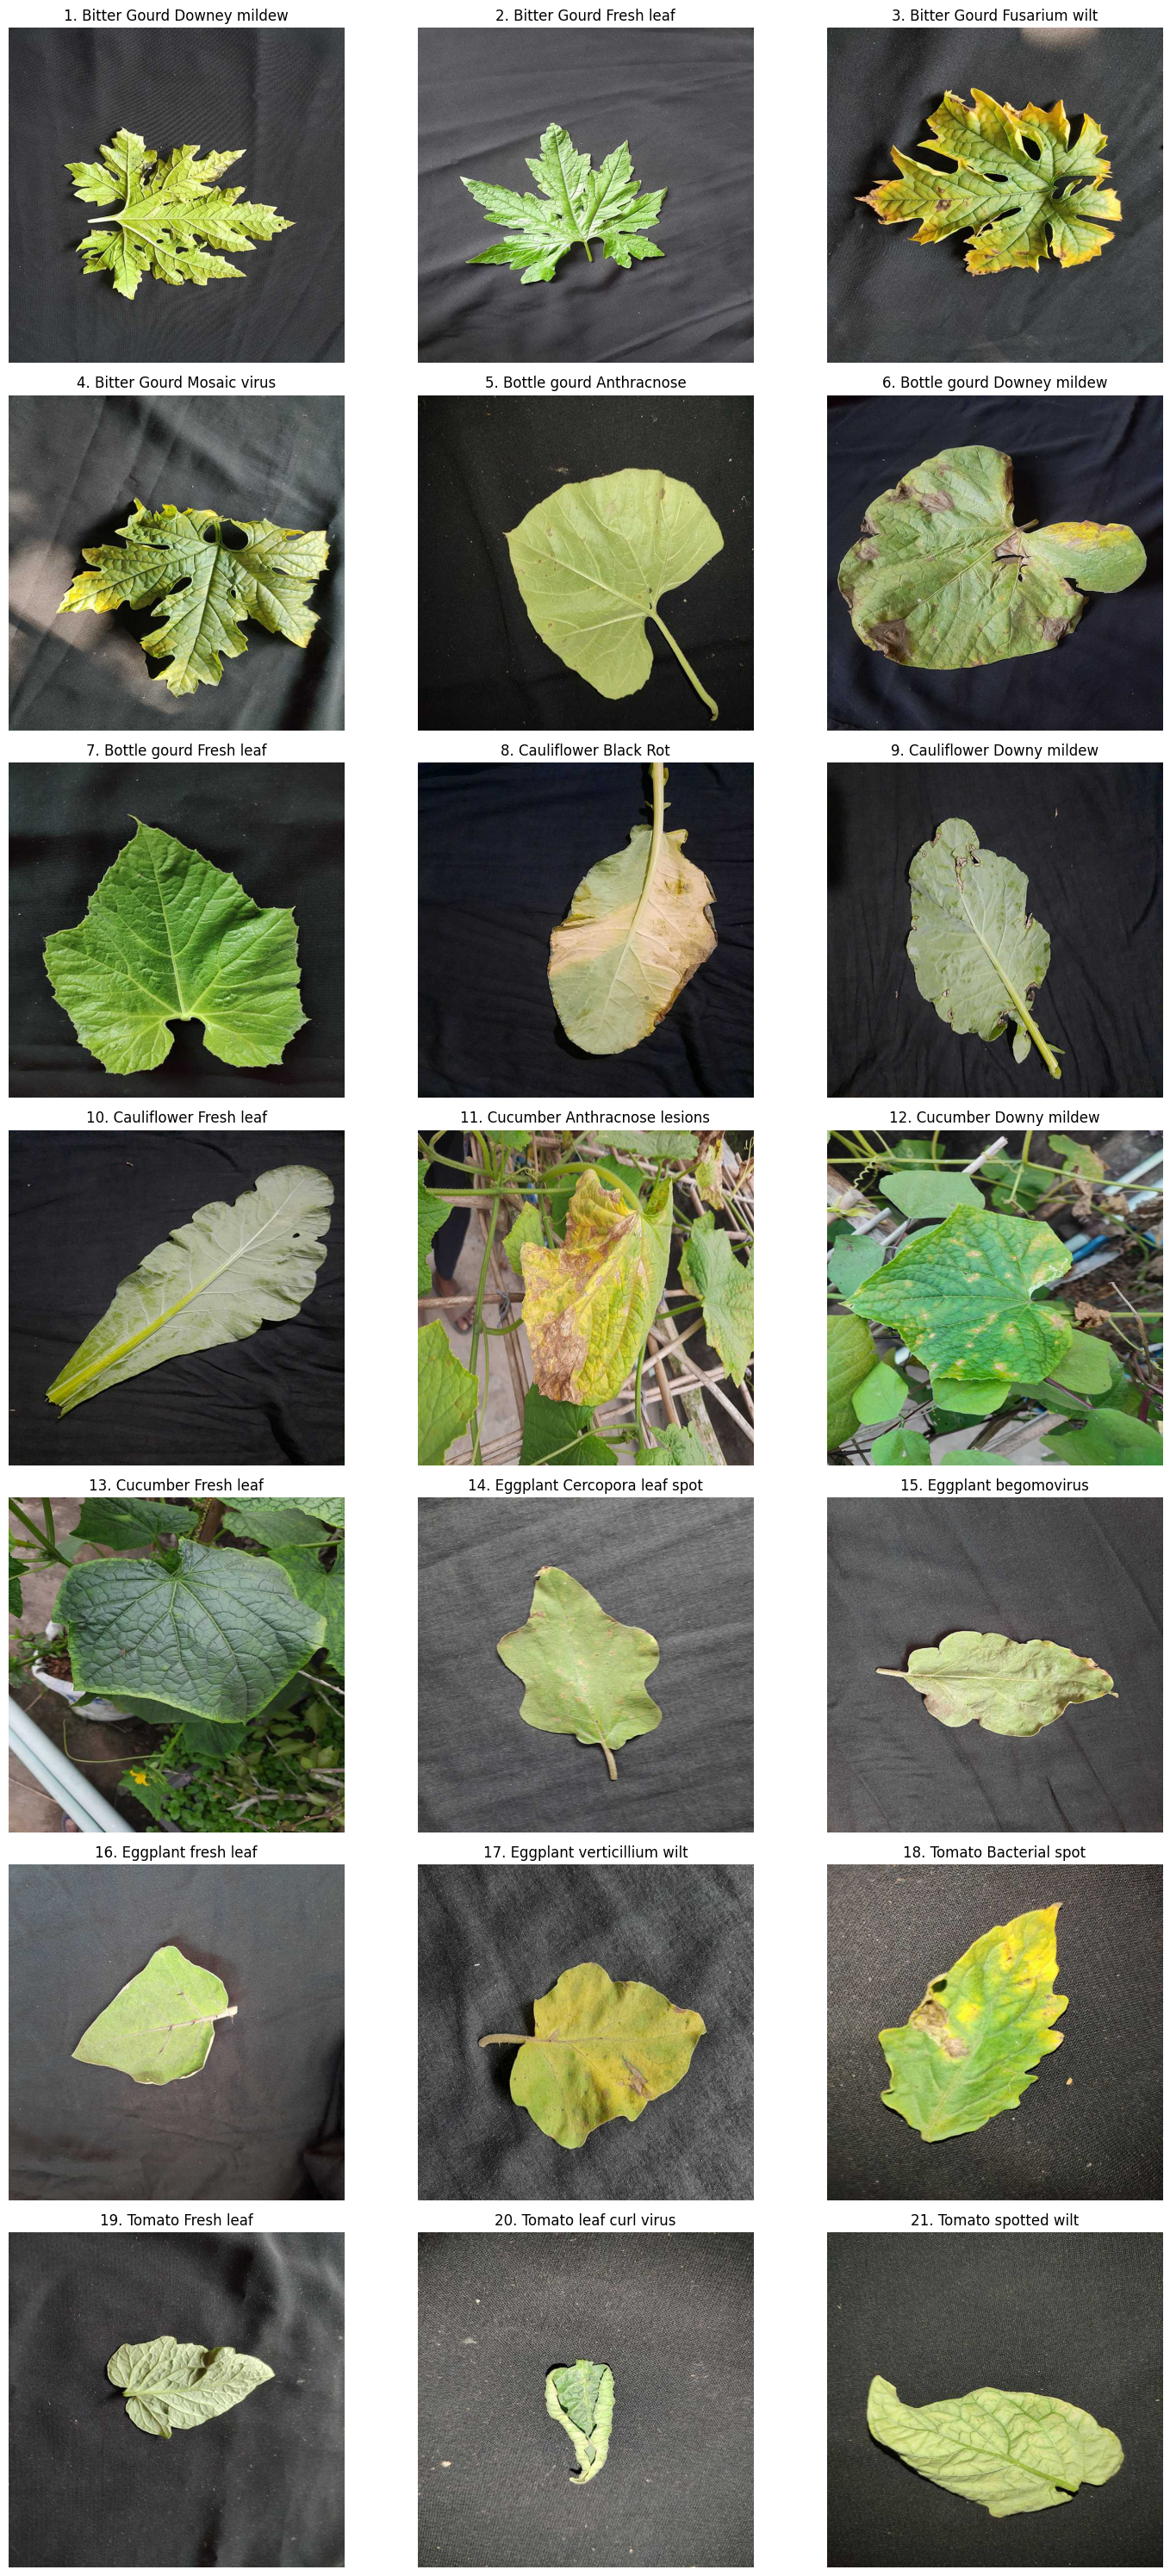

In [5]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Output directory (where the 21 folders are located)
output_root_dir = "/kaggle/working/project"

# Image extensions
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}

# Display one image from each category
plt.figure(figsize=(15, 30))  # Adjusted for 21 images
for index, folder in enumerate(sorted(os.listdir(output_root_dir)), 1):
    folder_path = os.path.join(output_root_dir, folder)
    if os.path.isdir(folder_path):
        # Find the first image in the folder
        for file in os.listdir(folder_path):
            if os.path.isfile(os.path.join(folder_path, file)) and Path(file).suffix.lower() in image_extensions:
                img_path = os.path.join(folder_path, file)
                plt.subplot(7, 3, index)  # 7 rows, 3 columns for 21 images
                img = mpimg.imread(img_path)
                plt.imshow(img)
                plt.title(f"{index}. {folder}")
                plt.axis('off')
                break  # Move to next folder after finding one image
plt.tight_layout()
plt.show()

 ## Import Required Libraries

In [6]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git


!pip install lime

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-lndxljqj
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-lndxljqj
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 781dbc0d16ffa95b6d18b96b7b829840a82d93d1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from lime import lime_image
import zipfile
import os
from tqdm import tqdm  # Import tqdm for progress bars

## Pre-Processing and Load the Dataset
The original dataset contained 6 main folders, each representing a vegetable, with multiple subfolders inside corresponding to different leaf diseases and healthy leaves. To simplify training and improve clarity, we reorganized the dataset by merging all subfolders into a total of 21 separate folders—each folder now represents one specific disease class or healthy class across all vegetables. This structured organization facilitates easier loading and processing of data for training, validation, and testing phases.



In [12]:
# Define transformations with potential augmentations
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),      
    transforms.RandomHorizontalFlip(),     
    transforms.ToTensor(),                  
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),         
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
# Load dataset
dataset = datasets.ImageFolder(root="/kaggle/working/project", transform=transform_train)
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
# Apply test transformation to validation and test sets

val_dataset.dataset.transform = transform_test
test_dataset.dataset.transform = transform_test

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Custom CNN model

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        
        # Convolutional Layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(256 * 14 * 14, 512)  
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 21)  # Change 3 → my number of classes
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2)

        x = torch.flatten(x, start_dim=1)  # Dynamic flattening

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.fc4(x)

   
        return x


## Early Stopping Logic

In [14]:
class EarlyStopping:

    def __init__(self, patience=5):

        self.patience = patience
        self.counter = 0
        self.best_loss = np.inf

    def check_early_stop(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False


## Train the Model and Plot Loss Curves for Custom CNN

### Using AMP with Custom Model

To improve training speed, we can utilize Automatic Mixed Precision (AMP) provided by torch.cuda.amp. AMP enables faster training by using lower precision (float16) for parts of the computation while maintaining accuracy with some operations in higher precision (float32).

In [ ]:
from tqdm import tqdm  # Import tqdm for progress bars
from torch.cuda.amp import autocast, GradScaler  # Import AMP utilities

# Set number of epochs and initialize variables

num_epochs = 50  # Define the number of training epochs

model = CustomCNN().to('cuda')  # Move model to GPU

criterion = nn.CrossEntropyLoss()  # Loss function

optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer with learning rate

early_stopping = EarlyStopping(patience=5)  # Initialize early stopping with patience

train_losses, val_losses = [], []  # Lists to store training and validation losses per epoch

# Initialize GradScaler for AMP
scaler = GradScaler()
# Loop over epochs
for epoch in range(num_epochs):

    print(f"Epoch {epoch+1}/{num_epochs}")
    # Training phase
    model.train()  # Set model to training mode
    train_loss = 0  # Initialize cumulative training loss for the epoch
    # Loop over training data with tqdm progress bar
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU
        optimizer.zero_grad()  # Clear previous gradients
        with autocast():  # Use AMP for mixed-precision calculations
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

        # Scale loss to avoid underflow for float16
        scaler.scale(loss).backward()  # Backward pass with scaled loss
        scaler.step(optimizer)  # Optimizer step
        scaler.update()  # Update the scaler for next iteration
        train_loss += loss.item()  # Accumulate the training loss

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0  # Initialize cumulative validation loss for the epoch
    with torch.no_grad():  # Disable gradient calculation for validation
        # Loop over validation data with tqdm progress bar
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU
            with autocast():  # Use AMP for mixed-precision calculations
                outputs = model(images)  # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
            val_loss += loss.item()  # Accumulate the validation loss

    # Calculate average losses and append to lists
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    progress = ((epoch + 1) / num_epochs) * 100
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f} - Progress: {progress:.2f}%")

    # Early stopping check
    if early_stopping.check_early_stop(avg_val_loss):
        print("Early stopping triggered.")
        break

## Loss Curve for Custom CNN

In [ ]:
# Plotting loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
# Define a path for saving the model
model_save_path = "custom_cnn_model.pth"  # You can specify a different path or filename

# Save the model after training completes or early stopping is triggered
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

## Model Evaluation and Metrics Calculation for Custom CNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Move model to evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Run inference
with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in test_loader:
        # Move images and labels to the same device as the model (GPU)
        images, labels = images.to('cuda'), labels.to('cuda')

        # Forward pass
        outputs = model(images)

        # Get predictions (choose the class with the highest logit score)
        _, predicted = torch.max(outputs, 1)

        # Append predictions and true labels to lists
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())    # Move to CPU and convert to numpy

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


##  Transfer Learning Model
Using pretrained models from PyTorch.

In [22]:
import torch.nn as nn
import timm

def get_transfer_model(model_name, num_classes):
    if model_name == 'resnext101_32x8d':
        model = timm.create_model('resnext101_32x8d', pretrained=True)
        model.fc = nn.Linear(model.get_classifier().in_features, num_classes)

    elif model_name == 'densenet201':
        model = timm.create_model('densenet201', pretrained=True)
        model.classifier = nn.Linear(model.get_classifier().in_features, num_classes)

    elif model_name == 'efficientnetv2_m':
        model = timm.create_model('efficientnetv2_m', pretrained=True)
        model.classifier = nn.Linear(model.get_classifier().in_features, num_classes)

    elif model_name == 'mobilenetv2_100':
        model = timm.create_model('mobilenetv2_100', pretrained=True)
        model.last_linear = nn.Linear(model.get_classifier().in_features, num_classes)

    elif model_name == 'seresnext101_32x8d':
        model = timm.create_model('seresnext101_32x8d', pretrained=True)
        model.fc = nn.Linear(model.get_classifier().in_features, num_classes)

    else:
        raise ValueError(f"Model '{model_name}' not supported. Please check the name.")

    return model


## Transfer Learning Example using ResNeXt101

In [ ]:
from tqdm import tqdm  # Import tqdm for progress bars
from torch.cuda.amp import autocast, GradScaler  # Import AMP utilities

# Set number of epochs and initialize variables
num_epochs = 50  # Define the number of training epochs
num_classes=21

# Use your custom CNN model (model_1) here
model_1 = get_transfer_model('resnext101_32x8d', num_classes).to('cuda')  # Using 'model_1' for custom CNN

criterion = nn.CrossEntropyLoss()  # Loss function

optimizer = optim.Adam(model_1.parameters(), lr=0.001)  # Optimizer with learning rate

early_stopping = EarlyStopping(patience=5)  # Initialize early stopping with patience

train_losses, val_losses = [], []  # Lists to store training and validation losses per epoch

# Initialize GradScaler for AMP
scaler = GradScaler()

# Loop over epochs
for epoch in range(num_epochs):

    print(f"Epoch {epoch+1}/{num_epochs}")
    # Training phase
    model_1.train()  # Set model to training mode
    train_loss = 0  # Initialize cumulative training loss for the epoch
    # Loop over training data with tqdm progress bar
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU

        optimizer.zero_grad()  # Clear previous gradients

        with autocast():  # Use AMP for mixed-precision calculations
            outputs = model_1(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

        # Scale loss to avoid underflow for float16
        scaler.scale(loss).backward()  # Backward pass with scaled loss
        scaler.step(optimizer)  # Optimizer step
        scaler.update()  # Update the scaler for next iteration
        train_loss += loss.item()  # Accumulate the training loss

    # Validation phase
    model_1.eval()  # Set model to evaluation mode
    val_loss = 0  # Initialize cumulative validation loss for the epoch
    with torch.no_grad():  # Disable gradient calculation for validation
        # Loop over validation data with tqdm progress bar
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU
            with autocast():  # Use AMP for mixed-precision calculations
                outputs = model_1(images)  # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
            val_loss += loss.item()  # Accumulate the validation loss

    # Calculate average losses and append to lists
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Early stopping check
    if early_stopping.check_early_stop(avg_val_loss):
        print("Early stopping triggered.")
        break

# Save the model
torch.save(model_1.state_dict(), 'custom_cnn_model_1.pth')  # Save the custom CNN model as 'custom_cnn_model_1.pth'
print("Model saved as 'custom_cnn_model_1.pth'")

## Loss Curve for ResNeXt101

In [ ]:
# Plotting loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss for ResNeXt101")
plt.show()

## Model Evaluation and Metrics Calculation for ResNeXt101

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Move model_1 to evaluation mode
model_1.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Run inference
with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in test_loader:
        # Move images and labels to the same device as the model (GPU)
        images, labels = images.to('cuda'), labels.to('cuda')

        # Forward pass
        outputs = model_1(images)  # Using model_1 for prediction

        # Get predictions (choose the class with the highest logit score)
        _, predicted = torch.max(outputs, 1)

        # Append predictions and true labels to lists
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())    # Move to CPU and convert to numpy

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

## Transfer Learning Example using densenet201

In [ ]:
# Set number of epochs and initialize variables
num_epochs = 50  # Define the number of training epochs
num_classes=21

# Initialize the DenseNet201 transfer learning model
model_2 = get_transfer_model('densenet201', num_classes).to('cuda')  # Using 'model_2' for DenseNet201

criterion = nn.CrossEntropyLoss()  # Loss function

optimizer = optim.Adam(model_2.parameters(), lr=0.001)  # Optimizer with learning rate

early_stopping = EarlyStopping(patience=5)  # Initialize early stopping with patience

train_losses, val_losses = [], []  # Lists to store training and validation losses per epoch

# Initialize GradScaler for AMP
scaler = GradScaler()

# Loop over epochs
for epoch in range(num_epochs):

    print(f"Epoch {epoch+1}/{num_epochs}")
    # Training phase
    model_2.train()  # Set model to training mode
    train_loss = 0  # Initialize cumulative training loss for the epoch
    
    # Loop over training data with tqdm progress bar
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU

        optimizer.zero_grad()  # Clear previous gradients

        with autocast():  # Use AMP for mixed-precision calculations
            outputs = model_2(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

        # Scale loss to avoid underflow for float16
        scaler.scale(loss).backward()  # Backward pass with scaled loss
        scaler.step(optimizer)  # Optimizer step
        scaler.update()  # Update the scaler for next iteration
        train_loss += loss.item()  # Accumulate the training loss

    # Validation phase
    model_2.eval()  # Set model to evaluation mode
    val_loss = 0  # Initialize cumulative validation loss for the epoch
    with torch.no_grad():  # Disable gradient calculation for validation
        # Loop over validation data with tqdm progress bar
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU
            with autocast():  # Use AMP for mixed-precision calculations
                outputs = model_2(images)  # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
            val_loss += loss.item()  # Accumulate the validation loss

    # Calculate average losses and append to lists
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Early stopping check
    if early_stopping.check_early_stop(avg_val_loss):
        print("Early stopping triggered.")
        break

# Save the model
torch.save(model_2.state_dict(), 'densenet201_model_2.pth')  # Save the DenseNet201 model as 'densenet201_model_2.pth'
print("Model saved as 'densenet201_model_2.pth'")

## Loss Curve for densenet201

In [ ]:
# Plotting loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss for densenet201")
plt.show()

## Model Evaluation and Metrics Calculation for densenet201

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Move model_2 to evaluation mode
model_2.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Run inference
with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in test_loader:
        # Move images and labels to the same device as the model (GPU)
        images, labels = images.to('cuda'), labels.to('cuda')

        # Forward pass
        outputs = model_2(images)  # Using model_2 for prediction

        # Get predictions (choose the class with the highest logit score)
        _, predicted = torch.max(outputs, 1)

        # Append predictions and true labels to lists
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())    # Move to CPU and convert to numpy

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

## Transfer Learning Example using efficientnetv2_m

In [ ]:
num_epochs = 50
num_classes=21
model_3 = get_transfer_model('efficientnetv2_m', num_classes).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_3.parameters(), lr=0.001)
early_stopping = EarlyStopping(patience=5)
scaler = GradScaler()
train_losses, val_losses = [], []

# Loop over epochs
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    
    # Training phase
    model_3.train()
    train_loss = 0
    
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to('cuda'), labels.to('cuda')

        optimizer.zero_grad()

        with autocast():
            outputs = model_3(images)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        train_loss += loss.item()

    # Validation phase
    model_3.eval()
    val_loss = 0
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to('cuda'), labels.to('cuda')
            with autocast():
                outputs = model_3(images)
                loss = criterion(outputs, labels)
            val_loss += loss.item()

    # Calculate average losses and append to lists
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Early stopping check
    if early_stopping.check_early_stop(avg_val_loss):
        print("Early stopping triggered.")
        break

# Save the model
torch.save(model_3.state_dict(), 'efficientnetv2_m_model_3.pth')
print("Model saved as 'efficientnetv2_m_model_3.pth'")

## Loss Curve for efficientnetv2_m

In [ ]:
# Plotting loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss for efficientnetv2_m")
plt.show()

## Model Evaluation and Metrics Calculation for efficientnetv2_m

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Move model_3 to evaluation mode
model_3.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Run inference
with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in test_loader:
        # Move images and labels to the same device as the model (GPU)
        images, labels = images.to('cuda'), labels.to('cuda')

        # Forward pass
        outputs = model_3(images)  # Using model_3 for prediction

        # Get predictions (choose the class with the highest logit score)
        _, predicted = torch.max(outputs, 1)

        # Append predictions and true labels to lists
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())    # Move to CPU and convert to numpy

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

## Transfer Learning Example using mobilenetv2_100

In [24]:
from tqdm import tqdm  # Import tqdm for progress bars
from torch.cuda.amp import autocast, GradScaler  # Import AMP utilities

# Set number of epochs and initialize variables
num_epochs = 50  # Define the number of training epochs
num_classes=21

# Use 'mobilenet_v2' as the base model for model_4
model_4 = get_transfer_model('mobilenetv2_100', num_classes).to('cuda')  # Using 'model_4' for mobilenet_v2

criterion = nn.CrossEntropyLoss()  # Loss function

optimizer = optim.Adam(model_4.parameters(), lr=0.001)  # Optimizer with learning rate

early_stopping = EarlyStopping(patience=5)  # Initialize early stopping with patience

train_losses, val_losses = [], []  # Lists to store training and validation losses per epoch

# Initialize GradScaler for AMP
scaler = GradScaler()

# Loop over epochs
for epoch in range(num_epochs):

    print(f"Epoch {epoch+1}/{num_epochs}")
    
    # Training phase
    model_4.train()  # Set model to training mode
    train_loss = 0  # Initialize cumulative training loss for the epoch
    # Loop over training data with tqdm progress bar
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU

        optimizer.zero_grad()  # Clear previous gradients

        with autocast():  # Use AMP for mixed-precision calculations
            outputs = model_4(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

        # Scale loss to avoid underflow for float16
        scaler.scale(loss).backward()  # Backward pass with scaled loss
        scaler.step(optimizer)  # Optimizer step
        scaler.update()  # Update the scaler for next iteration
        train_loss += loss.item()  # Accumulate the training loss

    # Validation phase
    model_4.eval()  # Set model to evaluation mode
    val_loss = 0  # Initialize cumulative validation loss for the epoch
    with torch.no_grad():  # Disable gradient calculation for validation
        # Loop over validation data with tqdm progress bar
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU
            with autocast():  # Use AMP for mixed-precision calculations
                outputs = model_4(images)  # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
            val_loss += loss.item()  # Accumulate the validation loss

    # Calculate average losses and append to lists
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Early stopping check
    if early_stopping.check_early_stop(avg_val_loss):
        print("Early stopping triggered.")
        break

# Save the model
torch.save(model_4.state_dict(), 'mobilenetv2_100_model_4.pth')  # Save the mobilenet_v2 model as 'nasnetalarge_model.pth'
print("Model saved as 'mobilenetv2_100_model_4.pth'")

/tmp/ipykernel_35/2254802786.py:20: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


Epoch 1/50


Training:   0%|          | 0/280 [00:00<?, ?it/s]/tmp/ipykernel_35/2254802786.py:36: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Use AMP for mixed-precision calculations
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


KeyboardInterrupt: 

## Loss Curve for mobilenetv2_100

In [ ]:
# Plotting loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss for mobilenetv2_100")
plt.show()

## Model Evaluation and Metrics Calculation for mobilenetv2_100

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Move model_4 to evaluation mode
model_4.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Run inference
with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in test_loader:
        # Move images and labels to the same device as the model (GPU)
        images, labels = images.to('cuda'), labels.to('cuda')

        # Forward pass
        outputs = model_4(images)  # Using model_4 for prediction

        # Get predictions (choose the class with the highest logit score)
        _, predicted = torch.max(outputs, 1)

        # Append predictions and true labels to lists
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())    # Move to CPU and convert to numpy

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

## Transfer Learning Example using seresnext101_32x8d

In [ ]:
# Set number of epochs and initialize variables
num_epochs = 50  # Define the number of training epochs
num_classes=21

# Use 'seresnext101_32x8d' as the base model for model_6
model_5 = get_transfer_model('seresnext101_32x8d', num_classes).to('cuda')  # Using 'model_6' for SEResNext101-32x8d

criterion = nn.CrossEntropyLoss()  # Loss function

optimizer = optim.Adam(model_5.parameters(), lr=0.001)  # Optimizer with learning rate

early_stopping = EarlyStopping(patience=5)  # Initialize early stopping with patience

train_losses, val_losses = [], []  # Lists to store training and validation losses per epoch

# Initialize GradScaler for AMP
scaler = GradScaler()

# Loop over epochs
for epoch in range(num_epochs):

    print(f"Epoch {epoch+1}/{num_epochs}")
    
    # Training phase
    model_5.train()  # Set model to training mode
    train_loss = 0  # Initialize cumulative training loss for the epoch
    # Loop over training data with tqdm progress bar
    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU

        optimizer.zero_grad()  # Clear previous gradients

        with autocast():  # Use AMP for mixed-precision calculations
            outputs = model_5(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

        # Scale loss to avoid underflow for float16
        scaler.scale(loss).backward()  # Backward pass with scaled loss
        scaler.step(optimizer)  # Optimizer step
        scaler.update()  # Update the scaler for next iteration
        train_loss += loss.item()  # Accumulate the training loss

    # Validation phase
    model_5.eval()  # Set model to evaluation mode
    val_loss = 0  # Initialize cumulative validation loss for the epoch
    with torch.no_grad():  # Disable gradient calculation for validation
        # Loop over validation data with tqdm progress bar
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to('cuda'), labels.to('cuda')  # Move data to GPU
            with autocast():  # Use AMP for mixed-precision calculations
                outputs = model_5(images)  # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
            val_loss += loss.item()  # Accumulate the validation loss

    # Calculate average losses and append to lists
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Early stopping check
    if early_stopping.check_early_stop(avg_val_loss):
        print("Early stopping triggered.")
        break

# Save the model
torch.save(model_5.state_dict(), 'seresnext101_32x8d_model_5.pth')  # Save the SEResNext101-32x8d model as 'seresnext101_32x8d_model.pth'
print("Model saved as 'seresnext101_32x8d_model_5.pth'")

## Loss Curve for seresnext101_32x8d

In [ ]:
# Plotting loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss for seresnext101_32x8d")
plt.show()

## Model Evaluation and Metrics Calculation for seresnext101_32x8d

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Move model_6 to evaluation mode
model_5.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Run inference
with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in test_loader:
        # Move images and labels to the same device as the model (GPU)
        images, labels = images.to('cuda'), labels.to('cuda')

        # Forward pass
        outputs = model_5(images)  # Using model_6 for prediction

        # Get predictions (choose the class with the highest logit score)
        _, predicted = torch.max(outputs, 1)

        # Append predictions and true labels to lists
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())    # Move to CPU and convert to numpy

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

## XAI - Grad-CAM, Grad-CAM++, Eigen-CAM

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torchvision import models
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

class_names = dataset.classes

# Load the fine-tuned DenseNet-201 model
num_classes = len(dataset.classes)
model = models.densenet201(weights=models.DenseNet201_Weights.IMAGENET1K_V1)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
model.load_state_dict(torch.load("densenet201_model_2.pth"))  # ✅ Correct filename
model = model.to('cuda')
model.eval()

# Select a sample image from the test dataset
sample_image, _ = test_dataset[0]
sample_image = sample_image.unsqueeze(0).to('cuda')  # Add batch dimension and move to GPU

# Convert sample image to numpy for visualization
original_image_np = sample_image.squeeze(0).permute(1, 2, 0).cpu().numpy()
original_image_np = (original_image_np * 0.5) + 0.5  # Unnormalize
original_image_np = np.clip(original_image_np, 0, 1)

# Set up Grad-CAM, Grad-CAM++, and Eigen-CAM
target_layers = [model.features[-1]]  # Last conv layer of DenseNet

# Initialize CAM methods
gradcam = GradCAM(model=model, target_layers=target_layers)
gradcam_plus_plus = GradCAMPlusPlus(model=model, target_layers=target_layers)
eigen_cam = EigenCAM(model=model, target_layers=target_layers)

# Run inference to get the predicted class
with torch.no_grad():
    outputs = model(sample_image)
    predicted_class = outputs.argmax().item()
    predicted_class_name = class_names[predicted_class]  # Get the class name

# Define the target class for CAM methods
target = [ClassifierOutputTarget(predicted_class)]

# Generate heatmaps using Grad-CAM, Grad-CAM++, and Eigen-CAM
gradcam_heatmap = gradcam(input_tensor=sample_image, targets=target)[0]
gradcam_pp_heatmap = gradcam_plus_plus(input_tensor=sample_image, targets=target)[0]
eigen_cam_heatmap = eigen_cam(input_tensor=sample_image, targets=target)[0]

# Overlay the heatmaps on the original image
gradcam_result = show_cam_on_image(original_image_np, gradcam_heatmap, use_rgb=True)
gradcam_pp_result = show_cam_on_image(original_image_np, gradcam_pp_heatmap, use_rgb=True)
eigen_cam_result = show_cam_on_image(original_image_np, eigen_cam_heatmap, use_rgb=True)


In [ ]:
import matplotlib.pyplot as plt

# Plot the original image and CAM results
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(original_image_np)
plt.title(f"Original Image\n(Predicted: {predicted_class_name})")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(gradcam_result)
plt.title(f"Grad-CAM\n(Predicted: {predicted_class_name})")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(gradcam_pp_result)
plt.title(f"Grad-CAM++\n(Predicted: {predicted_class_name})")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(eigen_cam_result)
plt.title(f"Eigen-CAM\n(Predicted: {predicted_class_name})")
plt.axis("off")

plt.tight_layout()
plt.show()


## LIME

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
from PIL import Image
import torch
import torch.nn as nn
import numpy as np
from torchvision import models
import matplotlib.pyplot as plt

# Load the fine-tuned DenseNet-201 model
num_classes = len(dataset.classes)
model = models.densenet201(weights=models.DenseNet201_Weights.IMAGENET1K_V1)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
model.load_state_dict(torch.load("densenet201_model_2.pth"))
model = model.to('cuda')
model.eval()

# Select a sample image from the dataset and preprocess it for display
sample_image, _ = dataset[0]  # Get the first image from the dataset
original_image_np = sample_image.permute(1, 2, 0).cpu().numpy()
original_image_np = (original_image_np * 0.5) + 0.5  # Unnormalize
original_image_np = np.clip(original_image_np, 0, 1)  # Ensure valid range [0, 1]

# Define a function to make predictions for LIME
def batch_predict(images):
    model.eval()
    # Convert numpy arrays to PIL images and apply transformations
    batch = torch.stack([transform_test(Image.fromarray((image * 255).astype(np.uint8))) for image in images], dim=0).to('cuda')
    with torch.no_grad():
        logits = model(batch)
    return logits.cpu().numpy()

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Generate LIME explanation for the sample image
lime_explanation = explainer.explain_instance(
    original_image_np,  # Original image in numpy format
    batch_predict,      # Prediction function
    top_labels=1,       # Focus on the top predicted class
    hide_color=0,
    num_samples=100     # Number of perturbed samples
)

# Get the predicted class
predicted_class = model(sample_image.unsqueeze(0).to('cuda')).argmax().item()

# Get the image and mask for the predicted class
lime_img, lime_mask = lime_explanation.get_image_and_mask(
    label=predicted_class,
    positive_only=True,
    hide_rest=False,
    num_features=10,
    min_weight=0.01
)
lime_img = mark_boundaries(lime_img, lime_mask)

# Display the original and LIME result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image_np)
plt.title(f"Original Image\n(Predicted: {class_names[predicted_class]})")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(lime_img)
plt.title(f"LIME\n(Predicted: {class_names[predicted_class]})")
plt.axis("off")

plt.tight_layout()
plt.show()
